<a href="https://colab.research.google.com/github/rines-nes/music-genre-classification-using-pca-and-logitic-regression/blob/main/music%20genre%20classification%20using%20PCA%20and%20LOGISTIC%20REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [336]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# New Section

In [363]:
df=pd.read_csv('/music_dataset_mod.csv')
df.head()


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [339]:
df.Genre.unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

In [340]:
df.columns

Index(['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
       'String Instrument Detection', 'Electronic Element Presence',
       'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
       'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps',
       'Genre'],
      dtype='object')

<ipython-input-341-269f736faa68>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='viridis')


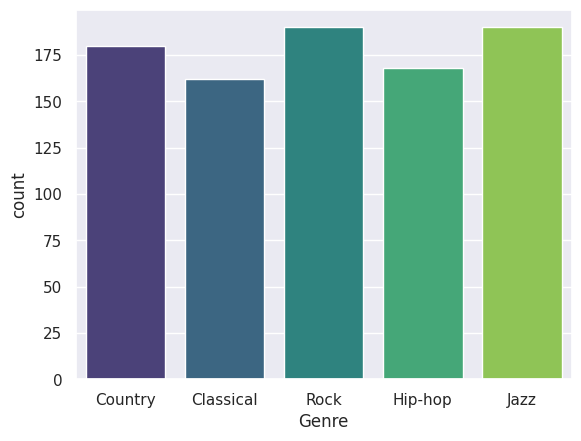

In [341]:
sns.countplot(x='Genre', data=df, palette='viridis')
plt.show()

In [342]:
df.isnull().sum()

,0
Tempo,0
Dynamics Range,0
Vocal Presence,0
Percussion Strength,0
String Instrument Detection,0
Electronic Element Presence,0
Rhythm Complexity,0
Drums Influence,0
Distorted Guitar,0
Metal Frequencies,0


In [343]:
df.dropna(subset=['Genre'], inplace=True)

In [344]:
X = df.drop(columns='Genre')
y = df['Genre']


In [345]:
label_encoder = LabelEncoder()
y_encoded= label_encoder.fit_transform(y)



In [346]:
yy=label_encoder.inverse_transform(y_encoded)
yy

array(['Country', 'Classical', 'Rock', 'Hip-hop', 'Country', 'Rock',
       'Hip-hop', 'Country', 'Country', 'Country', 'Classical', 'Hip-hop',
       'Hip-hop', 'Rock', 'Hip-hop', 'Rock', 'Jazz', 'Classical', 'Rock',
       'Hip-hop', 'Country', 'Classical', 'Country', 'Jazz', 'Jazz',
       'Rock', 'Jazz', 'Rock', 'Hip-hop', 'Country', 'Rock', 'Country',
       'Rock', 'Classical', 'Classical', 'Jazz', 'Classical', 'Jazz',
       'Rock', 'Classical', 'Jazz', 'Country', 'Jazz', 'Country',
       'Hip-hop', 'Country', 'Rock', 'Country', 'Rock', 'Classical',
       'Country', 'Country', 'Classical', 'Jazz', 'Hip-hop', 'Rock',
       'Rock', 'Country', 'Hip-hop', 'Classical', 'Country', 'Country',
       'Classical', 'Jazz', 'Country', 'Jazz', 'Rock', 'Hip-hop',
       'Hip-hop', 'Jazz', 'Classical', 'Hip-hop', 'Country', 'Jazz',
       'Hip-hop', 'Hip-hop', 'Classical', 'Hip-hop', 'Jazz', 'Country',
       'Classical', 'Rock', 'Jazz', 'Hip-hop', 'Classical', 'Hip-hop',
       'Jazz', 'C

In [347]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nClass to Encoded Number Mapping:")
print(class_mapping)

# Alternatively, you can print the `classes_` directly
print("\nClasses sorted alphabetically and their corresponding encoded number:")
for index, class_name in enumerate(label_encoder.classes_):
    print(f"{index}: {class_name}")


Class to Encoded Number Mapping:
{'Classical': 0, 'Country': 1, 'Hip-hop': 2, 'Jazz': 3, 'Rock': 4}

Classes sorted alphabetically and their corresponding encoded number:
0: Classical
1: Country
2: Hip-hop
3: Jazz
4: Rock


In [348]:
dff=df.copy()
dff['Genre_encoded']=label_encoder.fit_transform(df['Genre'])


In [349]:
dff = dff.drop(columns=['Genre'])



In [350]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [351]:
corr_matrix = dff.corr()
corr_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


In [352]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


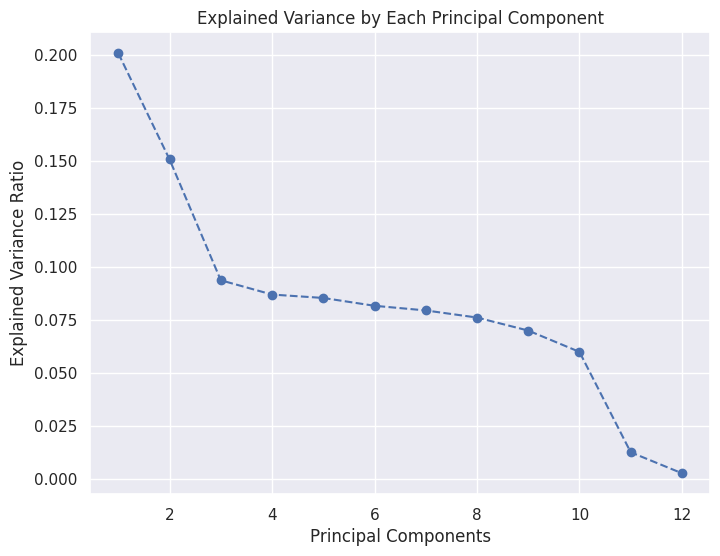

In [353]:
pca = PCA()  # Fit PCA on the scaled training data
X=pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


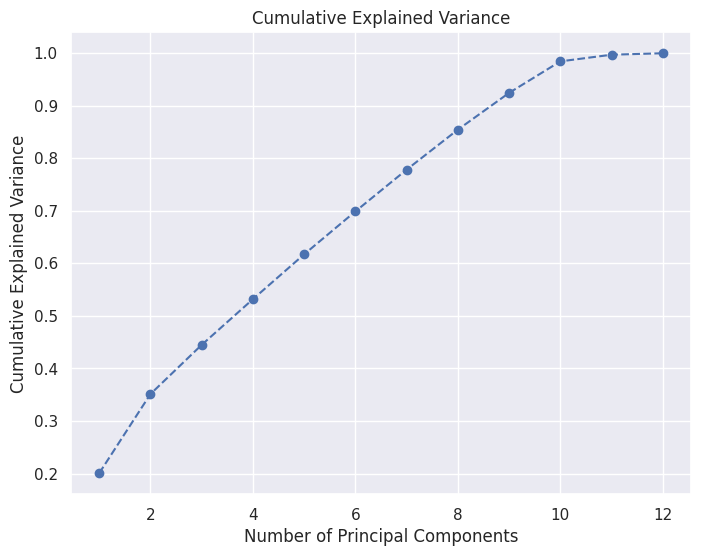

Cumulative explained variance ratio:
[0.20063071 0.35125878 0.44495077 0.53191983 0.61728037 0.69895416
 0.77843687 0.85457161 0.92457383 0.98453586 0.99720895 1.        ]


In [354]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Optional: Show the cumulative variance for each number of components
print("Cumulative explained variance ratio:")
print(cumulative_variance)

In [355]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)  # Transform the training data


In [356]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [357]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.5356


In [358]:
print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Generate a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with the first 12 features: 0.5356

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [359]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.5318


In [360]:
print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Generate a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with the first 12 features: 0.5318

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [364]:
 miss=df[df['Genre'].isnull()]
 miss=miss.drop(columns=['Genre'])


In [365]:
miss

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


In [366]:
miss_scaled = scaler.fit_transform(miss)


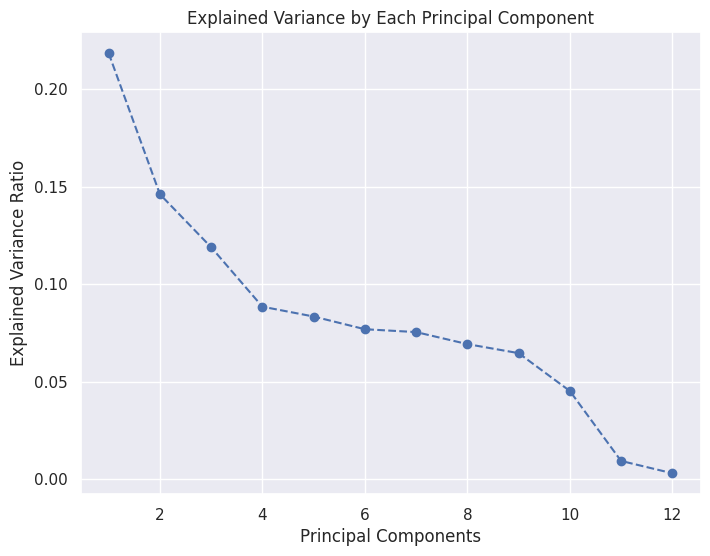

In [368]:
pca = PCA()  # Fit PCA on the scaled training data
miss=pca.fit_transform(miss_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

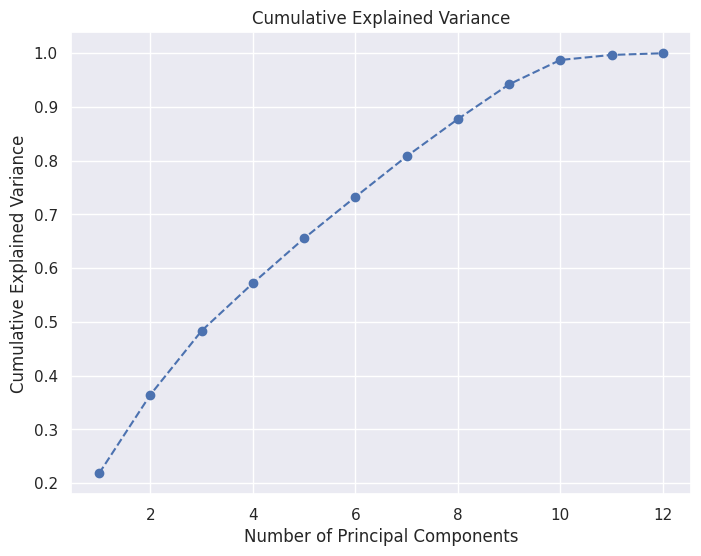

Cumulative explained variance ratio:
[0.21849294 0.36466667 0.48366174 0.57218448 0.65566642 0.73263168
 0.80813286 0.87746908 0.94217134 0.987468   0.99689272 1.        ]


In [369]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Optional: Show the cumulative variance for each number of components
print("Cumulative explained variance ratio:")
print(cumulative_variance)

In [370]:
y_pre=logreg.predict(miss)
y_pre

array([1, 4, 2, 2, 3, 3, 4, 4, 4, 2, 3, 1, 4, 2, 3, 3, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 2, 4, 1, 2, 0, 3, 3, 1, 1, 0, 4,
       3, 2, 3, 3, 1, 1, 4, 1, 0, 4, 4, 3, 2, 4, 1, 1, 2, 3, 1, 1, 3, 4,
       2, 3, 1, 3, 1, 4, 2, 4, 3, 3, 1, 2, 4, 3, 4, 3, 2, 1, 0, 3, 2, 3,
       2, 4, 1, 4, 4, 0, 4, 0, 2, 4, 1, 3, 3, 1, 4, 3, 3, 2, 3, 2, 2, 4])

In [371]:
len(y_pre)

110

In [372]:
y_pred_original = label_encoder.inverse_transform(y_pre)

In [373]:
len(y_pred_original )

110

In [374]:
print("Predicted Genres:", y_pred_original)

Predicted Genres: ['Country' 'Rock' 'Hip-hop' 'Hip-hop' 'Jazz' 'Jazz' 'Rock' 'Rock' 'Rock'
 'Hip-hop' 'Jazz' 'Country' 'Rock' 'Hip-hop' 'Jazz' 'Jazz' 'Classical'
 'Country' 'Hip-hop' 'Classical' 'Country' 'Hip-hop' 'Country' 'Country'
 'Country' 'Country' 'Classical' 'Jazz' 'Country' 'Country' 'Country'
 'Country' 'Classical' 'Hip-hop' 'Rock' 'Country' 'Hip-hop' 'Classical'
 'Jazz' 'Jazz' 'Country' 'Country' 'Classical' 'Rock' 'Jazz' 'Hip-hop'
 'Jazz' 'Jazz' 'Country' 'Country' 'Rock' 'Country' 'Classical' 'Rock'
 'Rock' 'Jazz' 'Hip-hop' 'Rock' 'Country' 'Country' 'Hip-hop' 'Jazz'
 'Country' 'Country' 'Jazz' 'Rock' 'Hip-hop' 'Jazz' 'Country' 'Jazz'
 'Country' 'Rock' 'Hip-hop' 'Rock' 'Jazz' 'Jazz' 'Country' 'Hip-hop'
 'Rock' 'Jazz' 'Rock' 'Jazz' 'Hip-hop' 'Country' 'Classical' 'Jazz'
 'Hip-hop' 'Jazz' 'Hip-hop' 'Rock' 'Country' 'Rock' 'Rock' 'Classical'
 'Rock' 'Classical' 'Hip-hop' 'Rock' 'Country' 'Jazz' 'Jazz' 'Country'
 'Rock' 'Jazz' 'Jazz' 'Hip-hop' 'Jazz' 'Hip-hop' 'Hip-hop' 'Rock

In [375]:
missing_genre_rows = df[df['Genre'].isnull()]
missing_genre_indices = missing_genre_rows.index
assert len(y_pred_original) == len(missing_genre_indices), "The number of predictions must match the number of missing rows"
df.loc[missing_genre_indices, 'Genre'] = y_pred_original
print(df)

          Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
995   66.578839       54.533872       99.782246            95.633310   
996  126.570862       57.812829       90.809940            64.880583   
997  121.731543       51.385204       33.849400            17.044544   
998   97.070804       19.210429       62.662860            22.720453   
999   71.050781       32.967250       62.875776            78.868747   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768                    17.628630   
1    

In [376]:
print(f"Genre for row 992 after filling missing values: {df.loc[992, 'Genre']}")

Genre for row 992 after filling missing values: Jazz
